In [1]:
import pandas as pd
import neurohearing.common.tools as tools
import matplotlib.pyplot as plt

In [2]:
%cd ..

/home/marysia/Documents/GitHub/NeuroHearing


In [3]:
config = tools.load_config()

tonaldataname=config["tonaldataname"]
tonal_suffix = tonaldataname.split("_")[-1]
mri_suffix = "mri"

pesel_columnname = config["pesel_columnname"]

In [4]:
processed_tonal_audiometry_datapath = config["dataprocesseddirectory"] + tonaldataname +'.csv'
mri_mrophometric_datapath = config["datarawdirectory"] + config["mri_dataname"] + '.csv'
#mapping_datapath = config["datarawdirectory"] + config["mapping"] + '.csv'

data_audiometry = pd.read_csv(processed_tonal_audiometry_datapath, sep=None, engine='python', dtype={pesel_columnname: str})
data_mri = pd.read_csv(mri_mrophometric_datapath, sep=None, engine='python', dtype={pesel_columnname: str})

#mapping = pd.read_csv(mapping_datapath, sep=None, engine='python', dtype={pesel_columnname: str})

#data_mri = pd.merge(data_mri, mapping, on="identifier")

In [ ]:
data_audiometry

In [39]:
data_mri

,Unnamed: 0,A2009-ctx-lh-G_and_S_frontomargin_GrayVol,A2009-ctx-lh-G_and_S_frontomargin_ThickAvg,A2009-ctx-lh-G_and_S_frontomargin_ThickStd,A2009-ctx-lh-G_and_S_occipital_inf_GrayVol,A2009-ctx-lh-G_and_S_occipital_inf_ThickAvg,A2009-ctx-lh-G_and_S_occipital_inf_ThickStd,A2009-ctx-lh-G_and_S_paracentral_GrayVol,A2009-ctx-lh-G_and_S_paracentral_ThickAvg,A2009-ctx-lh-G_and_S_paracentral_ThickStd,...,ASEG-wm-lh-corpuscallosum_normRange,age,sex,hight,weight,PESEL,DataBadania,norm_confirmed,female,male
0,0,2265.0,2.444,0.525,2673.0,2.659,0.786,2669.0,2.108,0.565,...,NaN,71.7,F,168,81,22003600028078,2011-02-07,0,1,0
1,1,2119.0,2.544,0.730,2710.0,2.473,0.750,2757.0,2.285,0.530,...,NaN,34.9,M,176,85,40502810321039,2011-02-14,0,0,1
2,2,2064.0,2.361,0.581,2512.0,2.224,0.674,2927.0,2.407,0.639,...,NaN,59.4,F,158,64,28502000106198,2011-05-02,0,1,0
3,3,2424.0,2.215,0.522,2866.0,2.653,0.786,2544.0,2.121,0.511,...,NaN,63.9,F,167,77,26502400111150,2011-12-28,0,1,0
4,4,2858.0,2.614,0.604,3815.0,3.025,0.663,3752.0,2.756,0.607,...,NaN,14.2,F,162,48,51002000315087,2011-04-11,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21657,21657,2073.0,2.167,0.606,3775.0,2.601,0.639,3580.0,2.416,0.599,...,NaN,18.3,M,182,105,05512005511174,2024-09-18,0,0,1
21658,21658,1734.0,2.080,0.533,3180.0,2.425,0.621,2528.0,2.147,0.614,...,NaN,45.4,F,167,80,42002016916033,2024-05-14,0,1,0
21659,21659,2599.0,2.259,0.756,4288.0,2.629,0.559,2687.0,2.190,0.545,...,NaN,30.3,F,156,51,49503602829150,2024-09-25,0,1,0
21660,21660,2383.0,2.408,0.622,2645.0,2.358,0.636,2141.0,2.110,0.484,...,NaN,38.6,F,170,80,45502003526204,2024-08-06,0,1,0


In [40]:
data_audiometry

,UNNAMED: 0,ID_PACJENTA,NUMER_HISTORII_CHOROBY,NUMER_W_JEDNOSTCE,PESEL,DATA_BADANIA,DATA_OPISU,NAZWA_AUDIOMETRII,UWAGI_DO_AUDIOMETRII,TYP_AUDIOMETRII,...,bone_mean_condition_hf,first_option_zero_diff,first_option_10_diff,15_diff,REZERWA,WYNIK_X_250_diff_first_opt,WYNIK_X_500_diff_first_opt,WYNIK_X_1000_diff_first_opt,WYNIK_X_2000_diff_first_opt,hearing_type
0,1451928,25692,10003/2010,NaN,36506011615213,08.10.2012 14:06,2012-10-08 14:06:55,AT Audiometria tonalna,Audiogram ucha lewego,Air,...,NaN,0,0,0,0.0,-10.0,-5.0,-5.0,-5.0,zaden typ nie pasuje
1,1451927,25692,10003/2010,NaN,36506011615213,08.10.2012 14:06,2012-10-08 14:06:55,AT Audiometria tonalna,Audiogram ucha prawego,Air,...,NaN,0,0,0,0.0,-10.0,-5.0,-5.0,-5.0,zaden typ nie pasuje
2,1451926,25692,10003/2010,NaN,36506011615213,08.10.2012 14:06,2012-10-08 14:06:55,AT Audiometria tonalna,Audiogram ucha lewego,BoneMask,...,1,0,0,0,0.0,-10.0,-5.0,-5.0,-5.0,zaden typ nie pasuje
3,1451932,25692,10003/2010,NaN,36506011615213,08.10.2012 14:06,2012-10-08 14:06:55,AT Audiometria tonalna,Audiogram ucha prawego,BoneMask,...,1,0,0,0,0.0,-10.0,-5.0,-5.0,-5.0,zaden typ nie pasuje
4,1451925,25692,10003/2010,0401497,36506011615213,14.11.2024 09:00,2024-11-14 08:54:43,AT Audiometria tonalna,Audiogram ucha lewego,Air,...,NaN,0,0,0,0.0,-5.0,-5.0,-5.0,-5.0,zaden typ nie pasuje
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261274,845670,116830,99978/2010,0205555,25003200309096,09.02.2018 13:04,2018-02-09 13:09:52,AT Audiometria tonalna,Audiogram ucha prawego,BoneMask,...,0,0,0,0,0.0,-5.0,-5.0,-5.0,-5.0,NaN
261275,845678,116830,99978/2010,0239693,25003200309096,22.02.2019 10:40,2019-02-22 12:09:45,AT Audiometria tonalna,Audiogram ucha lewego,Air,...,NaN,0,1,1,1.0,-15.0,-20.0,-10.0,-10.0,Niedosluch_mieszany
261276,845676,116830,99978/2010,0239693,25003200309096,22.02.2019 10:40,2019-02-22 12:09:45,AT Audiometria tonalna,Audiogram ucha prawego,Air,...,NaN,0,0,1,1.0,-25.0,-10.0,-5.0,-10.0,zaden typ nie pasuje
261277,845677,116830,99978/2010,0239693,25003200309096,22.02.2019 10:40,2019-02-22 12:09:45,AT Audiometria tonalna,Audiogram ucha lewego,BoneMask,...,0,0,1,1,1.0,-15.0,-20.0,-10.0,-10.0,NaN


In [ ]:
data = pd.merge(data_mri, data_audiometry, on="PESEL")

In [44]:
data

,Unnamed: 0,A2009-ctx-lh-G_and_S_frontomargin_GrayVol,A2009-ctx-lh-G_and_S_frontomargin_ThickAvg,A2009-ctx-lh-G_and_S_frontomargin_ThickStd,A2009-ctx-lh-G_and_S_occipital_inf_GrayVol,A2009-ctx-lh-G_and_S_occipital_inf_ThickAvg,A2009-ctx-lh-G_and_S_occipital_inf_ThickStd,A2009-ctx-lh-G_and_S_paracentral_GrayVol,A2009-ctx-lh-G_and_S_paracentral_ThickAvg,A2009-ctx-lh-G_and_S_paracentral_ThickStd,...,bone_mean_condition_hf,first_option_zero_diff,first_option_10_diff,15_diff,REZERWA,WYNIK_X_250_diff_first_opt,WYNIK_X_500_diff_first_opt,WYNIK_X_1000_diff_first_opt,WYNIK_X_2000_diff_first_opt,hearing_type
0,0,2265.0,2.444,0.525,2673.0,2.659,0.786,2669.0,2.108,0.565,...,NaN,0,0,0,0.0,-10.0,-5.0,-5.0,-5.0,zaden typ nie pasuje
1,0,2265.0,2.444,0.525,2673.0,2.659,0.786,2669.0,2.108,0.565,...,NaN,0,0,0,0.0,-5.0,-5.0,-5.0,-5.0,zaden typ nie pasuje
2,0,2265.0,2.444,0.525,2673.0,2.659,0.786,2669.0,2.108,0.565,...,brak_obl,0,0,0,0.0,-10.0,-5.0,-5.0,-5.0,zaden typ nie pasuje
3,0,2265.0,2.444,0.525,2673.0,2.659,0.786,2669.0,2.108,0.565,...,brak_obl,0,0,0,0.0,-5.0,-5.0,-5.0,-5.0,zaden typ nie pasuje
4,0,2265.0,2.444,0.525,2673.0,2.659,0.786,2669.0,2.108,0.565,...,NaN,0,0,0,0.0,-10.0,-5.0,-5.0,-5.0,zaden typ nie pasuje
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253882,21659,2599.0,2.259,0.756,4288.0,2.629,0.559,2687.0,2.190,0.545,...,NaN,0,1,1,1.0,-15.0,-15.0,-15.0,-10.0,Niedosluch_przewodzeniowy
253883,21659,2599.0,2.259,0.756,4288.0,2.629,0.559,2687.0,2.190,0.545,...,1,0,0,0,0.0,-10.0,-5.0,-5.0,0.0,zaden typ nie pasuje
253884,21659,2599.0,2.259,0.756,4288.0,2.629,0.559,2687.0,2.190,0.545,...,1,0,1,1,1.0,-15.0,-15.0,-15.0,-10.0,NaN
253885,21660,2383.0,2.408,0.622,2645.0,2.358,0.636,2141.0,2.110,0.484,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
raw_tonal_audiometry_datapath = config["datarawdirectory"] + tonaldataname +'.csv'
data_audiometry_raw = pd.read_csv(raw_tonal_audiometry_datapath, sep=None, engine='python', dtype={pesel_columnname: str})

In [6]:
data_audiometry_raw[data_audiometry_raw['PESEL']=='40003608005234']

,Unnamed: 0,ID_PACJENTA,NUMER_HISTORII_CHOROBY,NUMER_W_JEDNOSTCE,PESEL,DATA_BADANIA,DATA_OPISU,NAZWA_AUDIOMETRII,UWAGI_DO_AUDIOMETRII,TYP_AUDIOMETRII,...,WYNIK_X_1000,WYNIK_X_1500,WYNIK_X_2000,WYNIK_X_3000,WYNIK_X_4000,WYNIK_X_6000,WYNIK_X_8000,WYNIKI_POZOSTALE,OPIS_BADANIA,WYKONUJACY_BADANIE
1516371,1516371,208711,198735/2011,0072785,40003608005234,2011-12-07 08:35:35,2011-12-07 08:35:35,AT Audiometria tonalna,Audiogram ucha prawego,Air,...,55.0,NaN,50.0,NaN,25.0,NaN,10.0,NaN,NaN,Hanna Czerniawska
1516372,1516372,208711,198735/2011,0072785,40003608005234,2011-12-07 08:35:35,2011-12-07 08:35:35,AT Audiometria tonalna,Audiogram ucha lewego,BoneMask,...,50.0,NaN,40.0,NaN,15.0,NaN,NaN,NaN,NaN,Hanna Czerniawska
1516373,1516373,208711,198735/2011,0072785,40003608005234,2011-12-07 08:35:35,2011-12-07 08:35:35,AT Audiometria tonalna,Audiogram ucha lewego,Air,...,55.0,NaN,45.0,NaN,20.0,NaN,25.0,NaN,NaN,Hanna Czerniawska
1516374,1516374,208711,198735/2011,0326654,40003608005234,2022-01-11 08:35:09,2022-01-11 08:44:21,AT Audiometria tonalna,Audiogram ucha prawego,BoneMask,...,50.0,NaN,65.0,NaN,30.0,NaN,NaN,NaN,NaN,Marzena Milewska
1516375,1516375,208711,198735/2011,0363121,40003608005234,2023-05-23 13:24:28,2023-05-23 13:35:05,AT Audiometria tonalna,Audiogram ucha lewego,Air,...,85.0,NaN,70.0,NaN,85.0,NaN,85.0,NaN,NaN,Krzysztof Zawadka
1516376,1516376,208711,198735/2011,0326654,40003608005234,2022-01-11 08:35:09,2022-01-11 08:44:21,AT Audiometria tonalna,Audiogram ucha lewego,BoneMask,...,45.0,NaN,60.0,NaN,35.0,NaN,NaN,NaN,NaN,Marzena Milewska
1516377,1516377,208711,198735/2011,0326654,40003608005234,2022-01-11 08:35:09,2022-01-11 08:44:21,AT Audiometria tonalna,Audiogram ucha lewego,Air,...,75.0,NaN,65.0,NaN,75.0,NaN,70.0,NaN,NaN,Marzena Milewska
1516378,1516378,208711,198735/2011,0347731,40003608005234,2022-10-13 09:58:20,2022-10-13 09:59:58,AT Audiometria tonalna,Audiogram ucha prawego,BoneMask,...,50.0,NaN,65.0,45.0,40.0,NaN,NaN,NaN,NaN,Joanna Ćwiertniewska
1516379,1516379,208711,198735/2011,0347731,40003608005234,2022-10-13 09:58:20,2022-10-13 09:59:58,AT Audiometria tonalna,Audiogram ucha prawego,Air,...,85.0,NaN,90.0,60.0,55.0,NaN,60.0,NaN,NaN,Joanna Ćwiertniewska
1516380,1516380,208711,198735/2011,0347731,40003608005234,2022-10-13 09:58:20,2022-10-13 09:59:58,AT Audiometria tonalna,Audiogram ucha lewego,BoneMask,...,50.0,NaN,60.0,NaN,45.0,NaN,NaN,NaN,NaN,Joanna Ćwiertniewska


In [68]:
data_mri_tonal = pd.merge(data_mri, data_audiometry, on=pesel_columnname)
data_mri_tonal[f'{config['date_column']}_{mri_suffix}'] = pd.to_datetime(data_mri_tonal[f'{config['date_column']}_{mri_suffix}'], errors='coerce')
data_mri_tonal[f'{config['date_column']}_{tonal_suffix}'] = pd.to_datetime(data_mri_tonal[f'{config['date_column']}_{tonal_suffix}'], errors='coerce')

data_mri_tonal[f'{mri_suffix}_{tonal_suffix}_date_diff'] = (data_mri_tonal[f'{config['date_column']}_{mri_suffix}'] - data_mri_tonal[f'{config['date_column']}_{tonal_suffix}']).abs()

data_mri_tonal_sorted = data_mri_tonal.sort_values([pesel_columnname, f'{mri_suffix}_{tonal_suffix}_date_diff'])
data_mri_tonal_filtered = data_mri_tonal_sorted.groupby(pesel_columnname).first().reset_index()

In [67]:
data_mri_tonal_sorted

,Unnamed: 0,A2009-ctx-lh-G_and_S_frontomargin_GrayVol,A2009-ctx-lh-G_and_S_frontomargin_ThickAvg,A2009-ctx-lh-G_and_S_frontomargin_ThickStd,A2009-ctx-lh-G_and_S_occipital_inf_GrayVol,A2009-ctx-lh-G_and_S_occipital_inf_ThickAvg,A2009-ctx-lh-G_and_S_occipital_inf_ThickStd,A2009-ctx-lh-G_and_S_paracentral_GrayVol,A2009-ctx-lh-G_and_S_paracentral_ThickAvg,A2009-ctx-lh-G_and_S_paracentral_ThickStd,...,identifier,female,male,PESEL,PTA2,earside_PTA2,hfPTA,earside_hfPTA,DATA_BADANIA_tonal,mri_tonal_date_diff
17,8918,2605.0,2.314,0.566,2159.0,2.224,0.617,1972.0,2.053,0.471,...,Patient8771,1,0,00221103502,55.000000,P,30.0,P,2014-09-02,225 days
19,10613,2284.0,2.625,0.739,2571.0,2.589,0.505,2230.0,2.257,0.614,...,Patient8771,1,0,00221103502,55.000000,P,30.0,P,2014-09-02,589 days
14,7432,2078.0,2.494,0.712,2667.0,2.205,0.664,2162.0,2.281,0.547,...,Patient7337,1,0,00322105438,35.000000,L,20.0,L,2013-01-02,1057 days
13,7210,2524.0,2.372,0.568,3064.0,2.530,0.872,3169.0,2.523,0.631,...,Patient7126,0,1,03273104439,30.000000,P,52.5,L,2019-03-27,1738 days
55,18952,2559.0,2.309,0.545,3087.0,2.462,0.567,2569.0,2.249,0.534,...,Patient18402,1,0,05300411044,35.000000,L,5.0,L,2019-04-08,1246 days
29,16541,1832.0,2.160,0.560,2833.0,2.354,0.708,2655.0,2.257,0.577,...,Patient16092,1,0,13290708071,13.333333,L,57.5,P,2022-09-23,865 days
30,16541,1832.0,2.160,0.560,2833.0,2.354,0.708,2655.0,2.257,0.577,...,Patient16092,1,0,13290708071,6.666667,L,55.0,L,2023-08-03,1179 days
0,362,2460.0,2.391,0.579,2078.0,2.078,0.465,2076.0,2.152,0.554,...,Patient362,1,0,47020602360,16.666667,L,60.0,L,2010-04-27,330 days
20,12137,2615.0,2.522,0.622,5498.0,2.710,0.727,2974.0,2.162,0.570,...,Patient11881,0,1,50093004241,78.333333,L,90.0,L,2016-10-27,405 days
18,10567,2077.0,2.358,0.577,2802.0,2.455,0.726,2384.0,2.305,0.570,...,Patient10372,1,0,52042910328,30.000000,P,52.5,P,2015-05-08,577 days


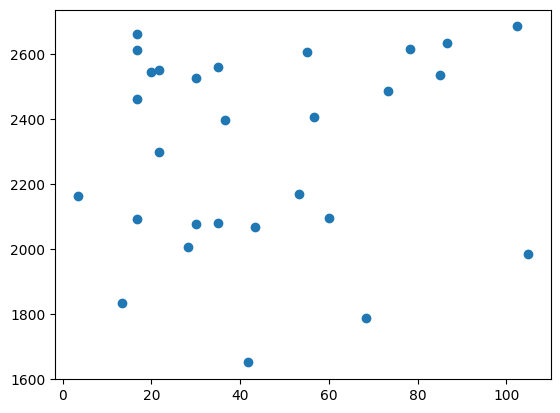

In [74]:
plt.scatter(data_mri_tonal_filtered['PTA2'], data_mri_tonal_filtered['A2009-ctx-lh-G_and_S_frontomargin_GrayVol'])
plt.show()

In [77]:
output_path_mri = config["dataprocesseddirectory"] +  config["mri_dataname"] + '.csv'
data_mri = pd.read_csv(output_path_mri, sep=None, engine='python', dtype={config["pesel_columnname"]: str})

In [81]:
data_mri

,Unnamed: 0.1,Unnamed: 0,A2009-ctx-lh-G_and_S_frontomargin_GrayVol,A2009-ctx-lh-G_and_S_frontomargin_ThickAvg,A2009-ctx-lh-G_and_S_frontomargin_ThickStd,A2009-ctx-lh-G_and_S_occipital_inf_GrayVol,A2009-ctx-lh-G_and_S_occipital_inf_ThickAvg,A2009-ctx-lh-G_and_S_occipital_inf_ThickStd,A2009-ctx-lh-G_and_S_paracentral_GrayVol,A2009-ctx-lh-G_and_S_paracentral_ThickAvg,...,age,sex,hight,weight,DataUrodzenia,DATA_BADANIA_mri,norm_confirmed,identifier,female,male
0,0,0,2265.0,2.444,0.525,2673.0,2.659,0.786,2669.0,2.108,...,71.7,F,168,81,1939-05-28,2011-02-07,0,Patient001,1,0
1,1,1,2119.0,2.544,0.730,2710.0,2.473,0.750,2757.0,2.285,...,34.9,M,176,85,1976-03-21,2011-02-14,0,Patient002,0,1
2,2,2,2064.0,2.361,0.581,2512.0,2.224,0.674,2927.0,2.407,...,59.4,F,158,64,1952-01-06,2011-05-02,0,Patient003,1,0
3,3,3,2424.0,2.215,0.522,2866.0,2.653,0.786,2544.0,2.121,...,63.9,F,167,77,1948-02-11,2011-12-28,0,Patient004,1,0
4,4,4,2858.0,2.614,0.604,3815.0,3.025,0.663,3752.0,2.756,...,14.2,F,162,48,1997-01-15,2011-04-11,0,Patient005,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21628,21657,21657,2073.0,2.167,0.606,3775.0,2.601,0.639,3580.0,2.416,...,18.3,M,182,105,2006-06-11,2024-09-18,0,Patient20931,0,1
21629,21658,21658,1734.0,2.080,0.533,3180.0,2.425,0.621,2528.0,2.147,...,45.4,F,167,80,1979-01-16,2024-05-14,0,Patient20932,1,0
21630,21659,21659,2599.0,2.259,0.756,4288.0,2.629,0.559,2687.0,2.190,...,30.3,F,156,51,1994-05-29,2024-09-25,0,Patient20933,1,0
21631,21660,21660,2383.0,2.408,0.622,2645.0,2.358,0.636,2141.0,2.110,...,38.6,F,170,80,1986-01-26,2024-08-06,0,Patient20934,1,0


In [80]:
data_mri['A2009-ctx-lh-G_oc-temp_med-Parahip_GrayVol'].min()

np.float64(9.0)

In [82]:
idx = data_mri['A2009-ctx-lh-G_oc-temp_med-Parahip_GrayVol'].idxmin()
print("Index wiersza z min:", idx)


Index wiersza z min: 15210


In [83]:
print(data_mri['A2009-ctx-lh-G_oc-temp_med-Parahip_GrayVol'].describe())

count    21602.000000
mean      3572.977595
std        708.296367
min          9.000000
25%       3068.000000
50%       3502.500000
75%       4024.000000
max      13455.000000
Name: A2009-ctx-lh-G_oc-temp_med-Parahip_GrayVol, dtype: float64


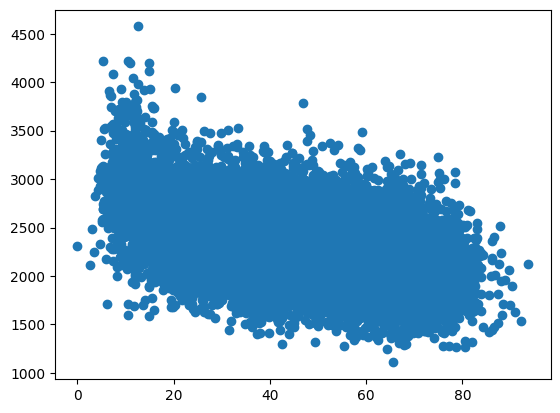

In [85]:
output_path_mri = config["dataprocesseddirectory"] +  config["mri_dataname"] + '.csv'
data_mri = pd.read_csv(output_path_mri, sep=None, engine='python', dtype={config["pesel_columnname"]: str})
data_mri = data_mri.rename(columns={"DataBadania": config['date_column'] + '_' + mri_suffix})
plt.scatter(data_mri['age'], data_mri['A2009-ctx-lh-G_and_S_frontomargin_GrayVol'])
plt.show()

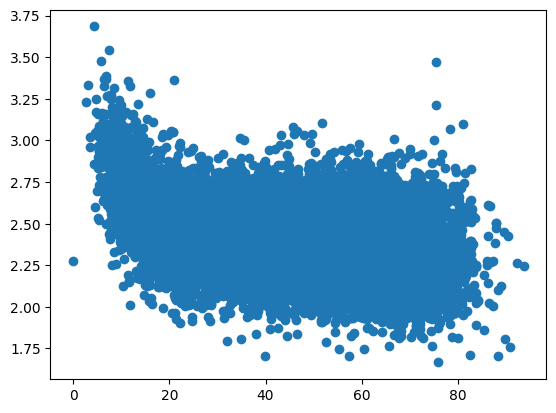

In [86]:
output_path_mri = config["dataprocesseddirectory"] +  config["mri_dataname"] + '.csv'
data_mri = pd.read_csv(output_path_mri, sep=None, engine='python', dtype={config["pesel_columnname"]: str})
data_mri = data_mri.rename(columns={"DataBadania": config['date_column'] + '_' + mri_suffix})
plt.scatter(data_mri['age'], data_mri['A2009-ctx-lh-G_and_S_frontomargin_ThickAvg'])
plt.show()

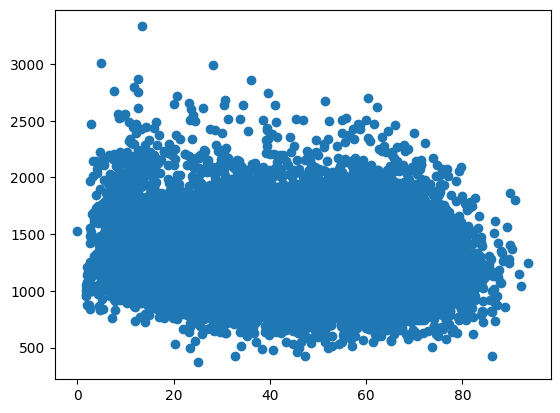

In [5]:
output_path_mri = config["dataprocesseddirectory"] +  config["mri_dataname"] + '.csv'
data_mri = pd.read_csv(output_path_mri, sep=None, engine='python', dtype={config["pesel_columnname"]: str})
data_mri = data_mri.rename(columns={"DataBadania": config['date_column'] + '_' + mri_suffix})
plt.scatter(data_mri['age'], data_mri['A2009-ctx-lh-S_pericallosal_GrayVol'])
plt.show()

In [14]:
raw_path_mri = config["datarawdirectory"] +  config["mri_dataname"] + '.csv'
raw_data_mri = pd.read_csv(raw_path_mri, sep=None, engine='python', dtype={config["pesel_columnname"]: str})
idx = raw_data_mri.index[raw_data_mri['identifier'] == 'Patient12015'].tolist()
print(idx)

[12279]


In [33]:
col='A2009-ctx-lh-S_pericallosal_GrayVol'    
mean = raw_data_mri[col].mean()
std = raw_data_mri[col].std()
difference = (raw_data_mri[col] - mean) / std
raw_data_mri['differences'] = difference

In [ ]:
raw_data_mri['differences'].max()
row_max = raw_data_mri.loc[raw_data_mri['differences'].idxmax()]
print(row_max)


Unnamed: 0                                           12279
A2009-ctx-lh-G_and_S_frontomargin_GrayVol           1114.0
A2009-ctx-lh-G_and_S_frontomargin_ThickAvg            2.85
A2009-ctx-lh-G_and_S_frontomargin_ThickStd           0.653
A2009-ctx-lh-G_and_S_occipital_inf_GrayVol          3948.0
                                                  ...     
norm_confirmed                                           0
identifier                                    Patient12015
female                                                   1
male                                                     0
differences                                      54.157218
Name: 12279, Length: 1561, dtype: object


In [38]:
idx = raw_data_mri.index[raw_data_mri['identifier'] == 'Patient12015'].tolist()

In [39]:
idx

[12279]

In [37]:
row_max[col]

np.float64(21535.0)

In [30]:
raw_data_mri[col][idx]

12279    1618.0
Name: A2009-ctx-lh-G_oc-temp_med-Parahip_GrayVol, dtype: float64

In [25]:
mean

np.float64(1280.5213351208913)

In [26]:
df = pd.read_csv(f"data/calculations/{config['tonaldataname']}.csv", sep=None, engine='python', dtype={'PESEL': str}, encoding='utf-8-sig')

In [27]:
df = df[df['IF_FIRST'] == 1]


In [28]:
BIAP_label_map = {
    "Prawidlowy": 0,
    "Lekki": 1,
    "Umiarkowany": 2,
    "Znaczny": 3,
    "Gleboki": 4
}

ASHA_label_map = {
    "Prawidlowy": 0,
    "Nieznaczny": 1,
    "Lekki": 2,
    "Umiarkowany": 3,
    "Umiarkowanie_ciezki": 4,
    "Znaczny": 5,
    "Gleboki": 6
}

hearing_type_map ={
    "Sluch_prawidlowy":0,
    "Niedosluch_przewodzeniowy":1,
    "Niedosluch_odbiorczy":2,
    "Niedosluch_mieszany":3
}


df["BIAP_code"] = df["BIAP"].map(BIAP_label_map)
df["ASHA_code"] = df["ASHA"].map(ASHA_label_map)
df["hearing_type_code"] = df["HEARING_TYPE"].map(hearing_type_map)

In [21]:
def plot_hearing_type(df):
    counts = df.groupby(["hearing_type_code", "EAR_SIDE"]).size().unstack(fill_value=0)
    counts.plot(kind="bar", figsize=(8,6))
    plt.xticks(range(4), hearing_type_map.keys(), rotation=45, fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("Poziom ubytku słuchu", fontsize=14)
    plt.ylabel("Liczba przypadków", fontsize=14)
    plt.title("Histogram rodzajów niedosłuchu", fontsize=16)
    plt.legend(title="Strona ucha", fontsize=12)
    plt.tight_layout()
    plt.show()

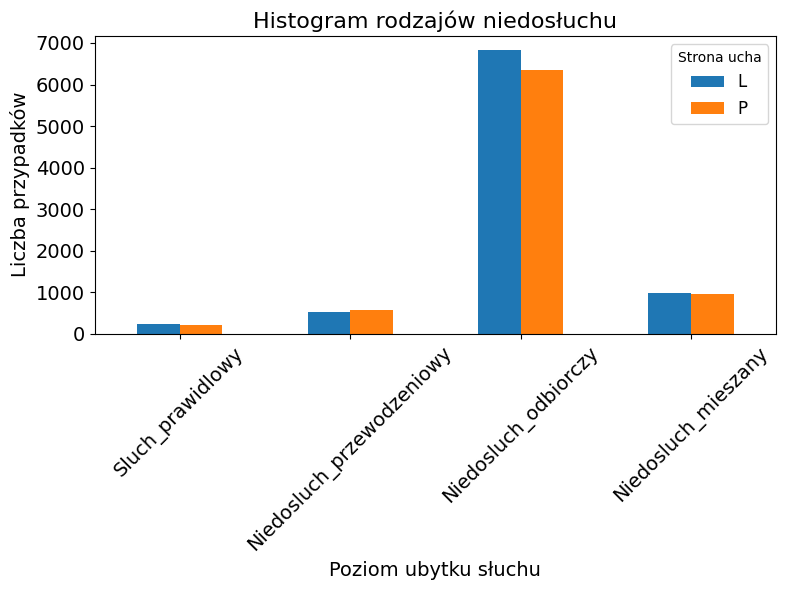

In [29]:
plot_hearing_type(df)

In [23]:
def plot_hearing_degree(df, allel1, allel2, map=ASHA_label_map, scale='ASHA'):
    if allel1 is not None:
        df_selected = df[(df['ALLELE_1_HGVS_C'] == allel1) & (df['ALLEL_2_HGVS_C']==allel2) | (df['ALLELE_1_HGVS_C'] == allel2) & (df['ALLEL_2_HGVS_C']==allel1)] 
        title = f"Histogram w skali {scale} dla alleli {allel1}, {allel2}"
    else:
        df_selected = df
        title = f"Histogram klasyfikacji słuchu w skali {scale}"

    inv_map = {v: k for k, v in map.items()}
    counts = df_selected.groupby([f"{scale}_code", "EAR_SIDE"]).size().unstack(fill_value=0)

    order = list(range(len(map)))
    counts = counts.reindex(order, fill_value=0)
    if counts.empty or counts.sum().sum() == 0:
        print(f"Brak danych do rysowania dla: {title}")
        return

    labels = [inv_map.get(x, str(x)) for x in counts.index]

    counts.plot(kind="bar", figsize=(8,6))
    plt.xticks(range(len(counts.index)), labels, rotation=45, fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(f"Poziom ubytku słuchu {scale}", fontsize=14)
    plt.ylabel("Liczba przypadków", fontsize=14)
    plt.title(title, fontsize=16)
    plt.legend(title="Strona ucha", fontsize=12)
    plt.tight_layout()
    plt.savefig(f"plots/hearing_{scale}_{allel1}_{allel2}.png", dpi=300, bbox_inches="tight")
    #plt.show()

    return counts

EAR_SIDE,L,P
BIAP_code,,
0,6522,6882
1,5135,5006
2,2815,2689
3,742,664
4,349,303


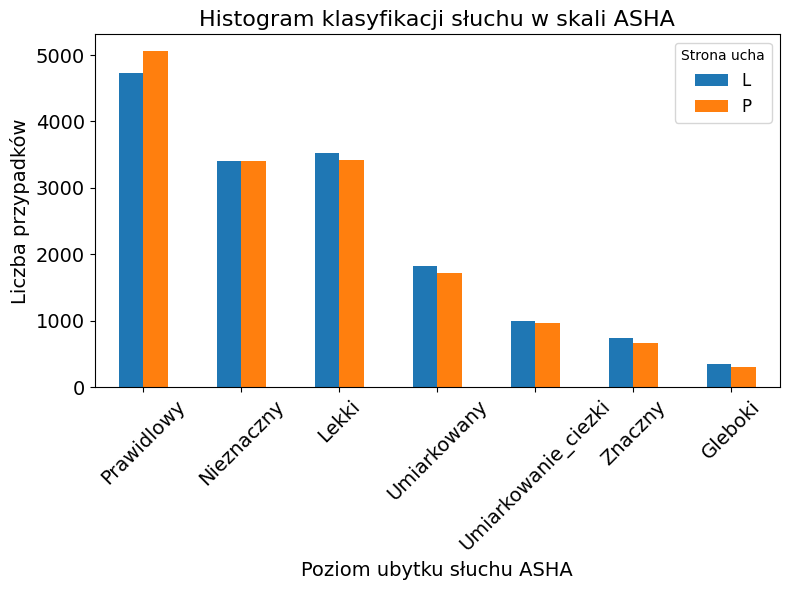

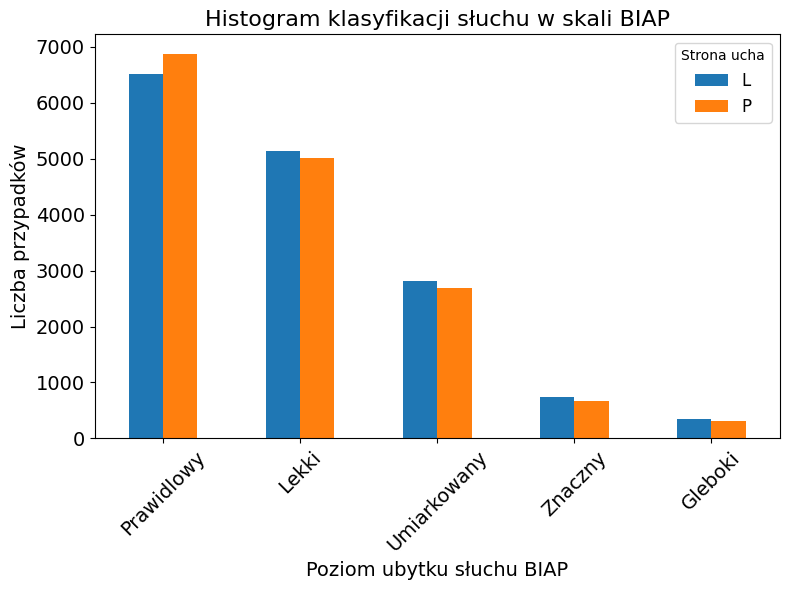

In [30]:
plot_hearing_degree(df, None, None, ASHA_label_map, 'ASHA')
plot_hearing_degree(df, None, None, BIAP_label_map, 'BIAP')

In [31]:
def plot_hearing_degree_combinations(df, allel1, allel2, map=ASHA_label_map, scale='ASHA', warianty=None):
    if allel1 is not None:
        df_selected = df[(df['ALLELE_1_HGVS_C'] == allel1) & (df['ALLEL_2_HGVS_C']==allel2) | (df['ALLELE_1_HGVS_C'] == allel2) & (df['ALLEL_2_HGVS_C']==allel1)] 

        title = f"Histogram w skali {scale} dla alleli {allel1}, {allel2}"
    else:
        df_selected = df
        if warianty:
            title = f"Histogram w skali {scale} dla wariantów {warianty}"
        else:
            title = f"Histogram klasyfikacji słuchu w skali {scale}"

    inv_map = {v: k for k, v in map.items()}

    group_columns = ['NUMER_HISTORII_CHOROBY'] + ['DATE_YEAR_MONTH_DAY']
    
    wyniki_all = []
    for _, group in df_selected.groupby(group_columns):
        wyniki = []
        ear_grouped = {g: d for g, d in group.groupby("EAR_SIDE")}

        for key in ear_grouped:
            group_ear = ear_grouped[key]
            wyniki.append(group_ear[f"{scale}_code"].iloc[0])

        comb = tuple(sorted(wyniki))
        wyniki_all.append(comb)
    wyniki_df = pd.DataFrame(wyniki_all, columns=['col1', 'col2'])

    mytable = wyniki_df.value_counts().reset_index(name='count')

    x_labels = [f"{inv_map[r[0]]}, {inv_map[r[1]]}" for r in zip(mytable['col1'], mytable['col2'])]
    
    plt.figure(figsize=(10,6))
    plt.bar(range(len(mytable)), mytable['count'])
    plt.xticks(range(len(mytable)), x_labels, rotation=45, ha='right', fontsize=12)
    plt.ylabel('Liczba przypadków', fontsize=14)
    plt.xlabel('Kombinacje stopnia ubytku słuchu', fontsize=14)
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()


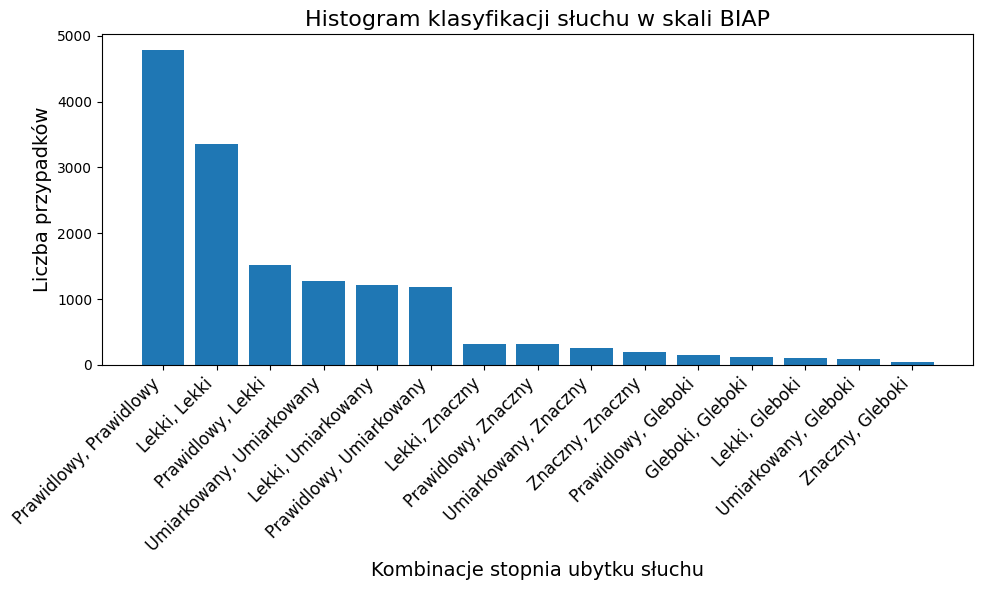

In [33]:
plot_hearing_degree_combinations(df, None, None, BIAP_label_map, 'BIAP')